# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
!pip install utils.py

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
url='https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv'

In [ ]:
dataset = pd.read_csv(url, skiprows=37, delimiter=',')

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos trata sobre los clientes de un banco a los cuales se le otorgaron créditos hipotecarios y muestra la descripción de cada solicitante en 12 variables. El conjunto de datos se encuentra formado por 5960 registros, donde cada uno representa un cliente al cual se le otorgó el préstamo.

2. La variable objetivo es un indicador binario que se pretende que prediga si un solicitante es un potencial fraude para otorgarle el crédito o lo pagará.

3. Para realizar la predicción se tienen disponibles los siguientes atributos:


*   LOAN: monto del préstamo requerido.
*   MORTDUE: monto adeudado de la hipoteca.
*   VALUE: valor de la propiedad.
*   YOG: años en el trabajo actual.
*   DEROG: número de informes derogados.
*   DELINQ: número de líneas de crédito morosas.
*   CLAGE: antiguedad de la línea comercial más antigua (en meses)
*   NINQ: número de líneas de crédito recientes.
*   CLNO: número de líneas de crédito
*   DEBTINC: ratio entre deuda-ingresos.

4. Los atributos que consideramos más determinantes para la predicción son:
- LOAN: monto del préstamo requerido.
- VALUE: valor de la propiedad.
- YOG: años en el trabajo actual.
- DELINQ: número de líneas de crédito morosas.
- CLNO: número de líneas de crédito
- DEBTINC: ratio entre deuda-ingresos.


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
# Crear una instancia del clasificador SGDClassifier. Elegimos la semilla 16 de modo aleatorio.
classifier_sgd = SGDClassifier(random_state=16)

In [ ]:
# Entrenar el clasificador en el conjunto de entrenamiento
classifier_sgd.fit(X_train, y_train)

SGDClassifier(random_state=16)

In [ ]:
# Predecir las etiquetas para el conjunto de entrenamiento y de evaluación
y_train_pred = classifier_sgd.predict(X_train)
y_test_pred = classifier_sgd.predict(X_test)

In [ ]:
# Calcular las métricas de evaluación
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Métricas de evaluación para el conjunto de entrenamiento:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1:", f1_train)
print("Matriz de confusión:")
print(confusion_matrix_train)
print()

print("Métricas de evaluación para el conjunto de evaluación:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1:", f1_test)
print("Matriz de confusión:")
print(confusion_matrix_test)

Métricas de evaluación para el conjunto de entrenamiento:
Accuracy: 0.8165879973027647
Precision: 0.18181818181818182
Recall: 0.02390438247011952
F1: 0.04225352112676056
Matriz de confusión:
[[1205   27]
 [ 245    6]]

Métricas de evaluación para el conjunto de evaluación:
Accuracy: 0.816711590296496
Precision: 0.08333333333333333
Recall: 0.017241379310344827
F1: 0.028571428571428574
Matriz de confusión:
[[302  11]
 [ 57   1]]


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       313
           1       0.08      0.02      0.03        58

    accuracy                           0.82       371
   macro avg       0.46      0.49      0.46       371
weighted avg       0.72      0.82      0.76       371



In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1232
           1       0.18      0.02      0.04       251

    accuracy                           0.82      1483
   macro avg       0.51      0.50      0.47      1483
weighted avg       0.72      0.82      0.75      1483



Text(0.5, 1.0, 'Matriz de Confusión - Evaluación')

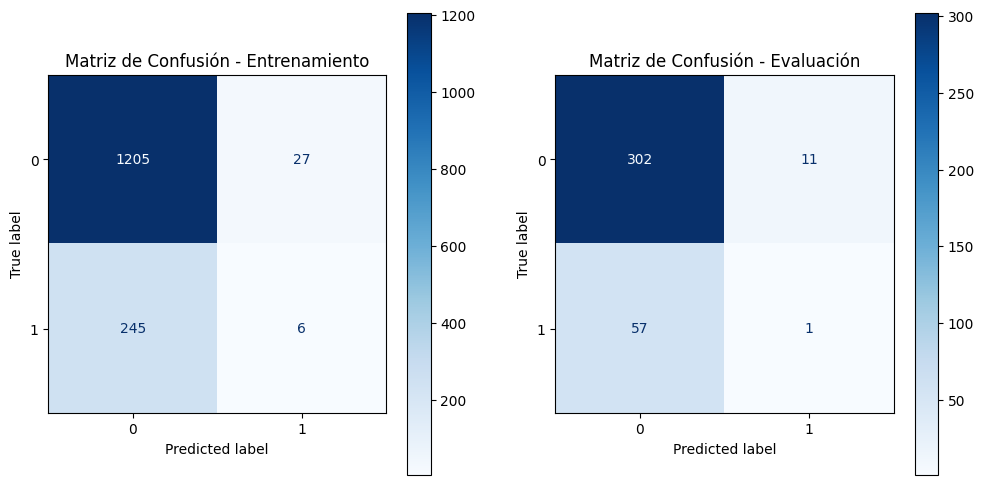

In [ ]:
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_train.plot(ax=axes[0],cmap='Blues')
axes[0].set_title('Matriz de Confusión - Entrenamiento')

disp_test.plot(ax=axes[1],cmap='Blues')
axes[1].set_title('Matriz de Confusión - Evaluación')




### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Definir los hiperparámetros a probar
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}



In [ ]:
# Realizar la búsqueda de hiperparámetros utilizando grid-search y validación cruzada
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(classifier_sgd, param_grid, cv=5)
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=16),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber']})

In [ ]:
# Obtener los resultados de la búsqueda de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge'}


In [ ]:
best_classifier_sgd = SGDClassifier(random_state=321, **best_params)

In [ ]:
best_classifier_sgd.fit(X_train, y_train)

SGDClassifier(random_state=321)

In [ ]:
# Evaluar el mejor modelo encontrado sobre el conjunto de entrenamiento
y_train_pred_best = best_classifier_sgd.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
train_precision_best = precision_score(y_train, y_train_pred_best)
train_recall_best = recall_score(y_train, y_train_pred_best)
train_f1_best = f1_score(y_train, y_train_pred_best)
train_confusion_matrix_best = confusion_matrix(y_train, y_train_pred_best)

print("\nResultados sobre el conjunto de entrenamiento con los mejores hiperparámetros:")
print("Accuracy:", train_accuracy_best)
print("Precision:", train_precision_best)
print("Recall:", train_recall_best)
print("F1:", train_f1_best)
print("Matriz de confusión:")
print(train_confusion_matrix_best)


# Evaluar el mejor modelo encontrado sobre el conjunto de evaluación
y_test_pred_best = best_classifier_sgd.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_precision_best = precision_score(y_test, y_test_pred_best)
test_recall_best = recall_score(y_test, y_test_pred_best)
test_f1_best = f1_score(y_test, y_test_pred_best)
test_confusion_matrix_best = confusion_matrix(y_test, y_test_pred_best)

print("\nResultados sobre el conjunto de evaluación con los mejores hiperparámetros:")
print("Accuracy:", test_accuracy_best)
print("Precision:", test_precision_best)
print("Recall:", test_recall_best)
print("F1:", test_f1_best)
print("Matriz de confusión:")
print(test_confusion_matrix_best)


Resultados sobre el conjunto de entrenamiento con los mejores hiperparámetros:
Accuracy: 0.8307484828051247
Precision: 0.0
Recall: 0.0
F1: 0.0
Matriz de confusión:
[[1232    0]
 [ 251    0]]

Resultados sobre el conjunto de evaluación con los mejores hiperparámetros:
Accuracy: 0.8436657681940701
Precision: 0.0
Recall: 0.0
F1: 0.0
Matriz de confusión:
[[313   0]
 [ 58   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1232
           1       0.18      0.02      0.04       251

    accuracy                           0.82      1483
   macro avg       0.51      0.50      0.47      1483
weighted avg       0.72      0.82      0.75      1483



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       313
           1       0.08      0.02      0.03        58

    accuracy                           0.82       371
   macro avg       0.46      0.49      0.46       371
weighted avg       0.72      0.82      0.76       371



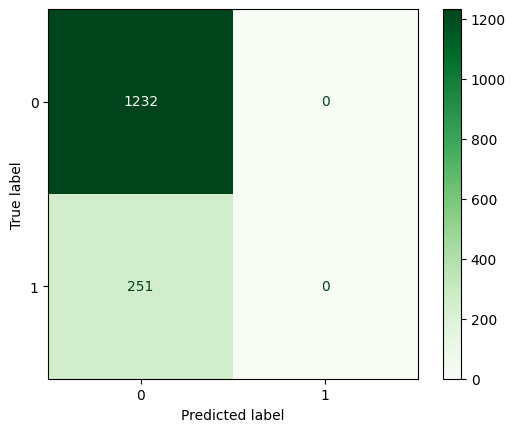

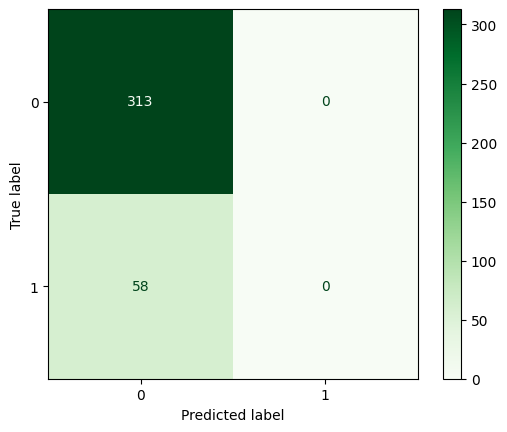

In [ ]:
disp_train_best = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix_best)
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix_best)

disp_train_best.plot(cmap='Greens')
disp_test_best.plot(cmap='Greens')

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Crear una instancia del DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=321)



In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=321)

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento y evaluación
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

In [ ]:

# Calcular las métricas de desempeño en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print("Resultados sobre el conjunto de entrenamiento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1:", train_f1)
print("Matriz de confusión:")
print(train_confusion_matrix)

# Calcular las métricas de desempeño en el conjunto de evaluación
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Resultados sobre el conjunto de evaluación:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1:", test_f1)
print("Matriz de confusión:")
print(test_confusion_matrix)

Resultados sobre el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Matriz de confusión:
[[1232    0]
 [   0  251]]
Resultados sobre el conjunto de evaluación:
Accuracy: 0.8921832884097035
Precision: 0.6730769230769231
Recall: 0.603448275862069
F1: 0.6363636363636364
Matriz de confusión:
[[296  17]
 [ 23  35]]


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       313
           1       0.67      0.60      0.64        58

    accuracy                           0.89       371
   macro avg       0.80      0.77      0.79       371
weighted avg       0.89      0.89      0.89       371



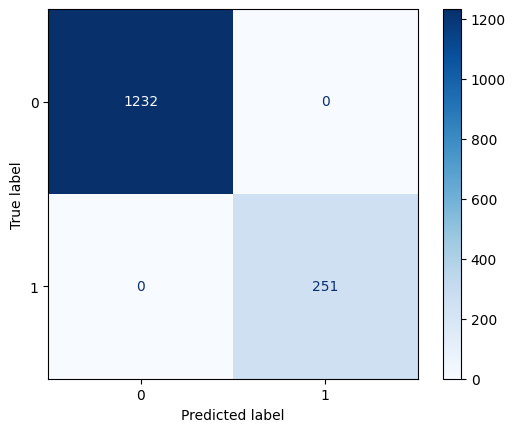

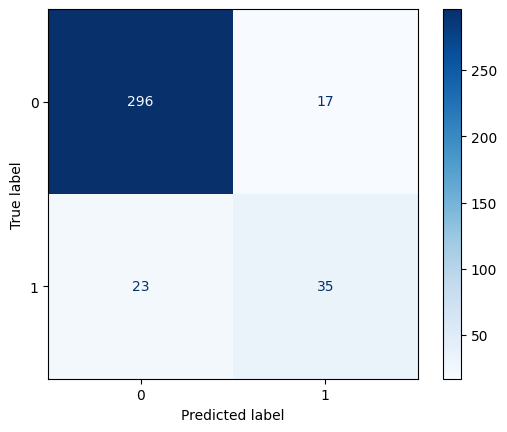

In [ ]:
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)

disp_train.plot(cmap='Blues')
disp_test.plot(cmap='Blues')

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Definir los hiperparámetros a probar
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 20]
}



In [ ]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV y 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=321),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 20]})

In [ ]:
# Obtener los resultados de la búsqueda de hiperparámetros
results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Imprimir los resultados de la búsqueda
print("Resultados de la búsqueda de hiperparámetros:")
print(results[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

print("\nMejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el mejor modelo encontrado sobre el conjunto de entrenamiento
y_train_pred_best = best_estimator.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
train_precision_best = precision_score(y_train, y_train_pred_best)
train_recall_best = recall_score(y_train, y_train_pred_best)
train_f1_best = f1_score(y_train, y_train_pred_best)
train_confusion_matrix_best = confusion_matrix(y_train, y_train_pred_best)

print("\nResultados sobre el conjunto de entrenamiento con los mejores hiperparámetros:")
print("Accuracy:", train_accuracy_best)
print("Precision:", train_precision_best)
print("Recall:", train_recall_best)
print("F1:", train_f1_best)
print("Matriz de confusión:")
print(train_confusion_matrix_best)


# Evaluar el mejor modelo encontrado sobre el conjunto de evaluación
y_test_pred_best = best_estimator.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_precision_best = precision_score(y_test, y_test_pred_best)
test_recall_best = recall_score(y_test, y_test_pred_best)
test_f1_best = f1_score(y_test, y_test_pred_best)
test_confusion_matrix_best = confusion_matrix(y_test, y_test_pred_best)

print("\nResultados sobre el conjunto de evaluación con los mejores hiperparámetros:")
print("Accuracy:", test_accuracy_best)
print("Precision:", test_precision_best)
print("Recall:", test_recall_best)
print("F1:", test_f1_best)
print("Matriz de confusión:")
print(test_confusion_matrix_best)

Resultados de la búsqueda de hiperparámetros:
   param_criterion param_max_depth param_min_samples_leaf  mean_test_score  \
0             gini            None                      1         0.857740   
1             gini            None                      5         0.869203   
2             gini            None                     10         0.877955   
3             gini            None                     20         0.864489   
4             gini               5                      1         0.875933   
5             gini               5                      5         0.873235   
6             gini               5                     10         0.877951   
7             gini               5                     20         0.868530   
8             gini              10                      1         0.879989   
9             gini              10                      5         0.879318   
10            gini              10                     10         0.877282   
11            gini

In [ ]:
print(classification_report(y_train, y_train_pred_best))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1232
           1       0.94      0.39      0.55       251

    accuracy                           0.89      1483
   macro avg       0.92      0.69      0.75      1483
weighted avg       0.90      0.89      0.87      1483



In [ ]:
print(classification_report(y_test, y_test_pred_best))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       313
           1       0.86      0.41      0.56        58

    accuracy                           0.90       371
   macro avg       0.88      0.70      0.75       371
weighted avg       0.89      0.90      0.88       371



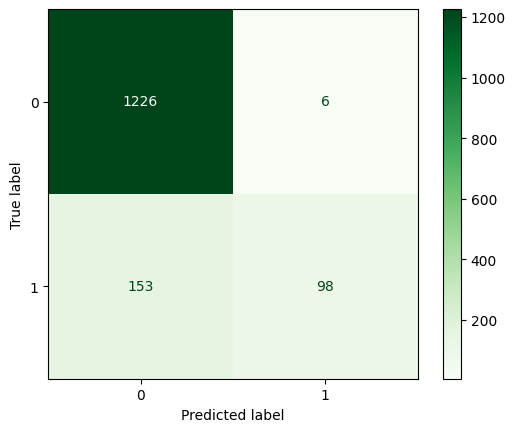

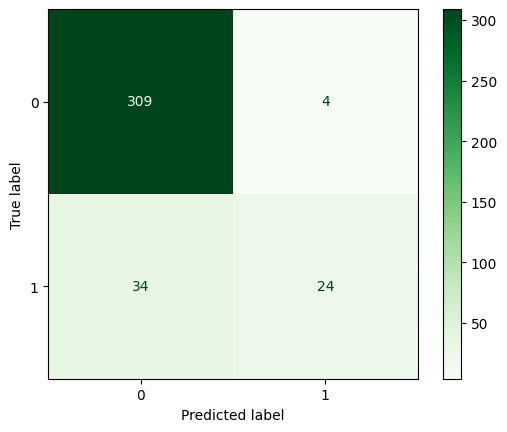

In [ ]:
disp_train_best = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix_best)
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix_best)

disp_train_best.plot(cmap='Greens')
disp_test_best.plot(cmap='Greens')